In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from code import inverse_problem as inv 
from code import direct_problem as dir 

direct_problem was imported
inverse_problem was imported


In [2]:
path_to_experimental_data='./experimental_data/BURM7.EXP'
f=open(path_to_experimental_data)
path_to_AB_MN_data=('./experimental_data/'+f.readline()).strip()
f.close()
dat = np.genfromtxt(path_to_experimental_data, comments= '$' , skip_header = 3)
experimental_rhoa = dat.T[2] # измеренные кажущиеся сопротивления
stt=np.genfromtxt(path_to_AB_MN_data,comments= '$')
AB2 = stt.T[0] # Полуразнос

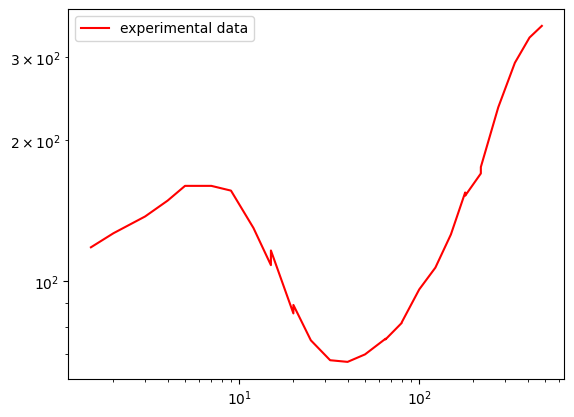

In [3]:
plt.loglog(AB2,experimental_rhoa,c='red', label='experimental data')
plt.legend()

In [45]:
N_layers_list=[3] # список из количества слоёв в моделях
exp_data=np.array([AB2, experimental_rhoa]).T # Данные
num=100
method='U'
auto=False
start=[[110,4,400,7,15,40,600]]

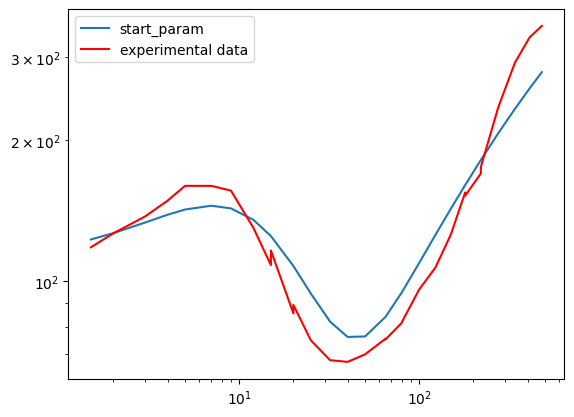

In [46]:
rk_start=[]
for r in AB2:
    rk_start.append(dir.calculate_apparent_resistance(start[0],method,r,num))
plt.loglog(AB2,rk_start, label='start_param')
plt.loglog(AB2,experimental_rhoa,c='red', label='experimental data')
plt.legend()

In [47]:
inverse=inv.inverse_problem_solver(N_layers_list,method,num, exp_data, auto=auto,start=start) 
results=inverse[0] # модели полученные из обратной задачи 
ind=inverse[1] #  индекс модели с наименьшим loss_N_layers в results
print(ind)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minimize.py:572: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,


0


In [50]:
#Вывод количества слоёв в модели, её параметров и полученной ошибки
for i in range (len(N_layers_list)):
    print('\nnumber of layers= ', N_layers_list[i],' \nparam =',results[i].x,'\nloss =',results[i].fun)


number of layers=  3  
param = [108.91699251   2.70299836 400.01764094   5.85502493  16.10855605
  38.19754454 605.74833525] 
loss = 21.258977343812862


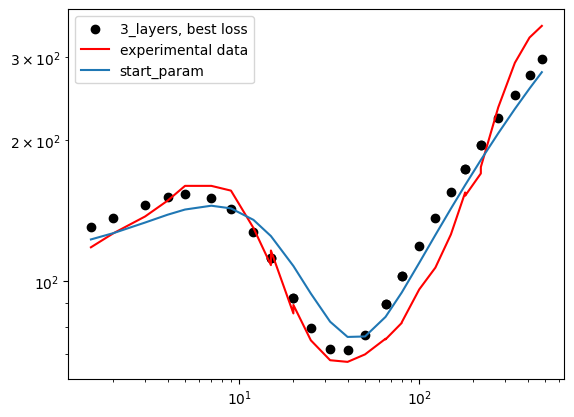

In [51]:
# Визуализация
for i in range(len(N_layers_list)):
    rk=[]
    for r in AB2:
        rk.append(dir.calculate_apparent_resistance(results[i].x,method,r,num))

    if i==ind:
        plt.scatter(AB2,rk, c='black',label=f'{N_layers_list[i]}_layers, best loss')
    else: plt.loglog(AB2,rk, label=f'{N_layers_list[i]}_layers')
plt.loglog(AB2,experimental_rhoa,c='red', label='experimental data')
plt.loglog(AB2,rk_start, label='start_param')
plt.legend()